In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
projectList = ["BOOKKEEPER", "STORM"]
datasetPathList = []

evaluationPath = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name_1}/Evaluation/{name_2}_Evaluation.csv"
outputImagePath = "/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/{name}/Charts/{imageTitle}.png"

for projectName in projectList :
    datasetPathList.append(evaluationPath.format(name_1 = projectName, name_2 = projectName))

datasetPathList

['/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/BOOKKEEPER/Evaluation/BOOKKEEPER_Evaluation.csv',
 '/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/STORM/Evaluation/STORM_Evaluation.csv']

In [77]:
def getData(dataset, version, classifier, myFilter, sampler, isSensitive) :
    filteredDataset = dataset
    if (version != None) :
        filteredDataset = filteredDataset[(filteredDataset["TrainingRelease"] == version)]
    if (classifier != None) :
        filteredDataset = filteredDataset[(filteredDataset["ClassifierName"] == classifier)]
    if (myFilter != None) :
        filteredDataset = filteredDataset[(filteredDataset["FilterName"] == myFilter)]
    if (sampler != None) :
        filteredDataset = filteredDataset[(filteredDataset["SamplerName"] == sampler)]
    if (isSensitive != None) :
        filteredDataset = filteredDataset[filteredDataset["SensitiveLearning"] == isSensitive]
    
    return filteredDataset

In [78]:
def boxPlotData(projectName, dataset, classifierList, filter, sampler, costSensitive) :
    figure, axis = plt.subplots(2, 2)
    figure.set_size_inches(16,9)
    figure.subplots_adjust(hspace=0.3)

    titleString = "BoxPlot:Filtro:{filterName},Sampling:{samplerName},CostSensitive:{costSensitive}"
    figure.suptitle(titleString.format(filterName = filter, samplerName = sampler, costSensitive = costSensitive))

    imagePath = outputImagePath.format(name = projectName, imageTitle = titleString)

    recallList = []
    precisionList = []
    rocList = []
    kappaList = []
    for classifier in classifierList :

        data = getData(dataset, None, classifier, filter, sampler, costSensitive)
    
        precisionData = data["Precision"]
        precisionData = precisionData[precisionData.notnull()]
    
        recallData = data["Recall"]
        recallData = recallData[recallData.notnull()]

        rocData = data["ROC_AUC"]
        rocData = rocData[rocData.notnull()]

        kappaData = data["Kappa"]
        kappaData = kappaData[kappaData.notnull()]

        recallList.append(recallData)
        precisionList.append(precisionData)
        rocList.append(rocData)
        kappaList.append(kappaData)

    for i in range(0,2) :
        for j in range(0,2) :
            axis[i,j].set_xticklabels(classifierList)
            axis[i,j].set_ylim(-0.1, 1)


    axis[0,0].boxplot(recallList)
    axis[0,0].set_title("Recall")

    axis[0,1].boxplot(precisionList)
    axis[0,1].set_title("Precision")

    axis[1,0].boxplot(rocList)
    axis[1,0].set_title("ROC AUC")

    axis[1,1].boxplot(kappaList)
    axis[1,1].set_title("Kappa")

    plt.savefig(imagePath)
    plt.show()
    

In [79]:
def analyzeProject(projectName) :

    datasetPath = evaluationPath.format(name_1 = projectName, name_2 = projectName)
    dataset = pd.read_csv(datasetPath)

    versions = dataset["TrainingRelease"].drop_duplicates().values
    classifiers = dataset["ClassifierName"].drop_duplicates().values
    filters = dataset["FilterName"].drop_duplicates().values
    samplers = dataset["SamplerName"].drop_duplicates().values
    sensitive = dataset["SensitiveLearning"].drop_duplicates().values

    for filter in filters :
        for sampler in samplers :
            for isSensitive in sensitive :
                if (sampler != "NotSet" and isSensitive) :
                    continue
                boxPlotData(projectName, dataset, classifiers, filter, sampler, isSensitive)
                    

In [80]:
def analyzeAllProjetcs() :
    for projectName in projectList :
        analyzeProject(projectName)

/tmp/ipykernel_5437/3766602642.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i,j].set_xticklabels(classifierList)


FileNotFoundError: [Errno 2] No such file or directory: '/home/simone/Scrivania/University/ISW2/Falessi/SoftwareInfoRetriever/output/BOOKKEEPER/Charts/BoxPlot:Filtro:{filterName},Sampling:{samplerName},CostSensitive:{costSensitive}.png'

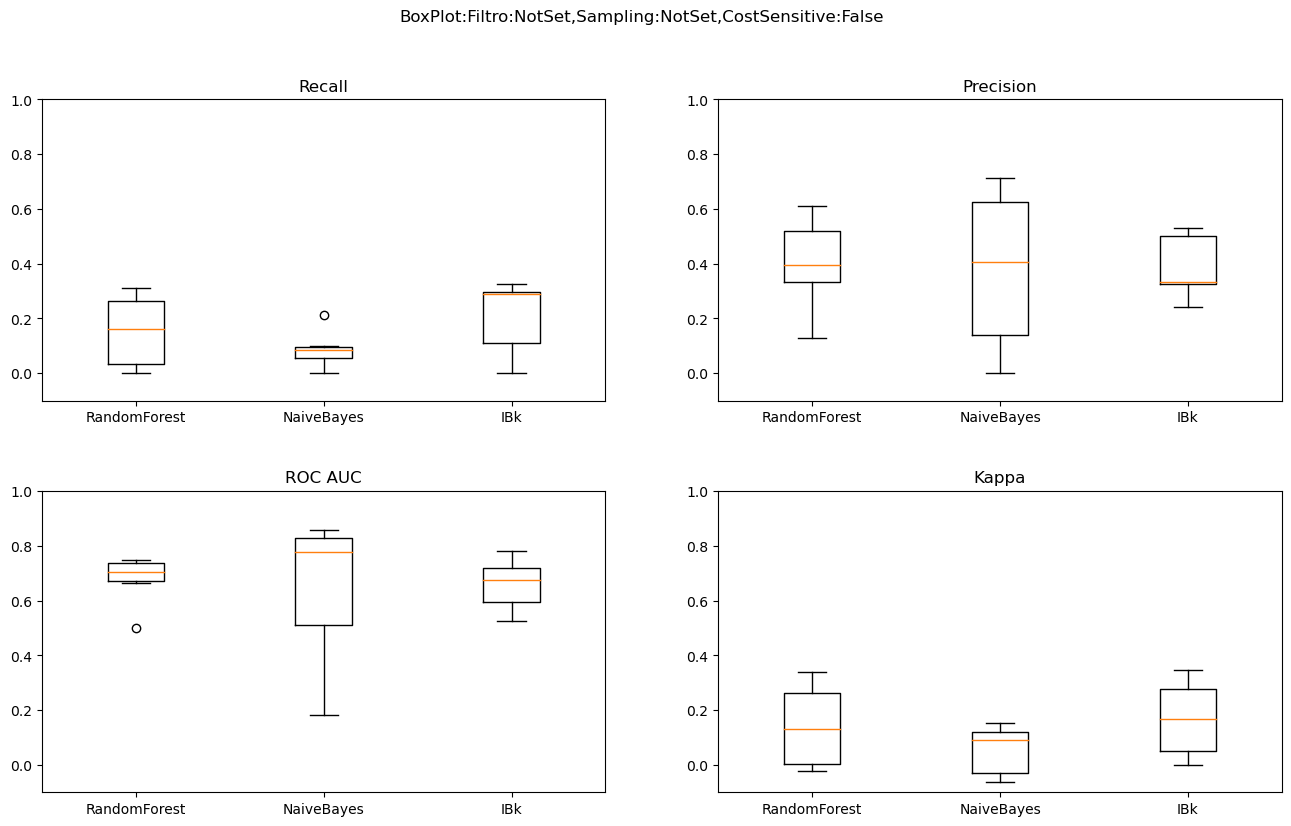

In [81]:
analyzeAllProjetcs()